# Effect of Latitude on Temperature, Humidity, Cloudiness, and WindSpeed
### Analysis
* The data obtained indicates a strong negative correlation between the absolute value of latitude and temperature
* The temperature on the southernmost latitudes is not dipping as much as that on the northernmost latitudes due to the tilt of the earth causing the southern latitudes to receive more seasonal sunshine
* There is not correlation between Latitude and each of the remaining atmospheric conditions, Humidity, Cloudiness, or Wind Speed

In [16]:
#Dependent packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import sys
import os

In [17]:
sys.path.append(os.path.join(".."))
from api_keys import api_key

In [18]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
data_dict = {"City":[],"Country":[],"Lat":[],"Lng":[]}

# Create a set of random lat and lng combinations
data_dict["Lat"] = np.random.uniform(low=-90.000, high=90.000, size=1500)
data_dict["Lng"] = np.random.uniform(low=-180.000, high=180.000, size=1500)


# Identify nearest city for each lat, lng combination
for idx in range(1500):
    data_dict["City"].append(citipy.nearest_city(data_dict["Lat"][idx], data_dict["Lng"][idx]).city_name)
    data_dict["Country"].append(citipy.nearest_city(data_dict["Lat"][idx], data_dict["Lng"][idx]).country_code)

# Converting to data frame and removing duplicate city names
data_dict=pd.DataFrame(data_dict)[["City","Country"]].drop_duplicates()
    
# Printing the city count to confirm sufficient count
data_dict.shape

(590, 2)

In [25]:
query_url="http://api.openweathermap.org/data/2.5/weather?"
data_dict["Cloudiness"]=0.0
data_dict["Date"]=0
data_dict["Humidity"]=0.0
data_dict["Lat"]=0.0
data_dict["Lng"]=0.0
data_dict["Max Temp"]=0.0
data_dict["Wind Speed"]=0.0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Including a print log of each city as it's being processed (with the city number and city name).


In [27]:
# initializing empty list to capture indices of cities with successful API response
valid_index=[]

#Looping through API calls, and updating atmospheric parameters for successful calls
for i in data_dict.index:
    response = requests.get(f"{query_url}appid={api_key}&q={data_dict['City'][i]},{data_dict['Country'][i]}&units=imperial").json()
    if response['cod']=='404':
        print(f"City not found; Skipping Record {i+1} | {data_dict['City'][i]}")
        continue
    else:
        print(f"Processing Record {i+1} | {data_dict['City'][i]}")
        valid_index.append(i)
        data_dict.loc[i,"Cloudiness"]=response['clouds']['all']
        data_dict.loc[i,"Date"]=response['dt']
        data_dict.loc[i,"Humidity"]=response['main']['humidity']
        data_dict.loc[i,"Lat"]=response['coord']['lat']
        data_dict.loc[i,"Lng"]=response['coord']['lon']
        data_dict.loc[i,"Max Temp"]=response['main']['temp_max']
        data_dict.loc[i,"Wind Speed"]=response['wind']['speed']

Processing Record 1 | punta arenas
City not found; Skipping Record 2 | faya
Processing Record 3 | jumla
Processing Record 4 | ushuaia
Processing Record 5 | bethel
Processing Record 6 | terrace
Processing Record 7 | dzidzantun
Processing Record 8 | rikitea
Processing Record 9 | smolenskoye
Processing Record 11 | victoria
Processing Record 12 | avarua
Processing Record 14 | albany
City not found; Skipping Record 16 | mataura
Processing Record 17 | port alfred
Processing Record 18 | jamestown
City not found; Skipping Record 19 | kamenskoye
Processing Record 20 | nikolskoye
Processing Record 21 | hobart
Processing Record 23 | clyde river
Processing Record 24 | dikson
City not found; Skipping Record 25 | mys shmidta
Processing Record 26 | busselton
Processing Record 28 | longyearbyen
Processing Record 29 | hilo
City not found; Skipping Record 30 | olafsvik
Processing Record 31 | trofors
Processing Record 32 | los llanos de aridane
Processing Record 33 | port elizabeth
Processing Record 34 |

Processing Record 402 | castro
Processing Record 406 | tiksi
Processing Record 407 | bambous virieux
City not found; Skipping Record 408 | kholm
Processing Record 414 | kamenka
City not found; Skipping Record 416 | rincon
Processing Record 417 | cornelius
Processing Record 418 | port lincoln
City not found; Skipping Record 420 | mullaitivu
Processing Record 422 | stokmarknes
Processing Record 424 | monforte de lemos
Processing Record 426 | padang
Processing Record 428 | gwadar
Processing Record 429 | thompson
Processing Record 430 | imeni poliny osipenko
Processing Record 431 | lavrentiya
City not found; Skipping Record 433 | bac lieu
Processing Record 436 | arraial do cabo
Processing Record 441 | norman wells
Processing Record 442 | fort nelson
Processing Record 444 | oyama
Processing Record 448 | dunedin
City not found; Skipping Record 449 | palabuhanratu
Processing Record 456 | ontario
Processing Record 458 | constitucion
Processing Record 460 | roblin
Processing Record 463 | lening

Processing Record 1061 | katobu
Processing Record 1063 | santa cruz
Processing Record 1065 | usinsk
Processing Record 1070 | sao filipe
City not found; Skipping Record 1075 | maunabo
Processing Record 1077 | henties bay
Processing Record 1081 | vardo
Processing Record 1082 | gari
City not found; Skipping Record 1085 | solsvik
Processing Record 1091 | vyshestebliyevskaya
Processing Record 1093 | naze
Processing Record 1103 | aranos
Processing Record 1105 | barao de melgaco
Processing Record 1112 | fukue
Processing Record 1113 | marawi
Processing Record 1115 | korla
Processing Record 1118 | matara
Processing Record 1125 | kulhudhuffushi
City not found; Skipping Record 1127 | kadykchan
Processing Record 1128 | mandalgovi
Processing Record 1130 | dubbo
Processing Record 1136 | luanda
Processing Record 1137 | benguela
Processing Record 1146 | bumba
Processing Record 1148 | hudson bay
Processing Record 1158 | kingsland
Processing Record 1170 | katangli
Processing Record 1171 | graaff-reinet


In [28]:
#removing cities without a valid API response
data_dict=data_dict.loc[valid_index,:]
#Inspecting dataframe
data_dict.shape

(508, 9)

### Convert Raw Data to DataFrame
* Exporting the city data into a .csv.
* Displaying the DataFrame

In [29]:
data_dict.to_csv("./City_Data.csv")
data_dict.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,punta arenas,cl,75.0,1551770589,86.0,-53.16,-70.91,37.4,12.75
2,jumla,np,76.0,1551771091,65.0,29.28,82.18,33.0,2.06
3,ushuaia,ar,40.0,1551769200,65.0,-54.81,-68.31,41.0,17.22
4,bethel,us,90.0,1551768960,93.0,60.79,-161.76,37.4,10.29
5,terrace,ca,5.0,1551769200,42.0,54.52,-128.61,26.6,14.99


### Plotting the Data
* plotting variables, adding labels, and saving plot

#### Latitude vs. Temperature Plot

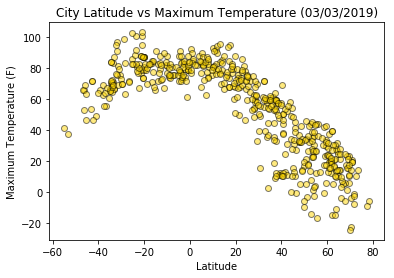

In [30]:
plt.scatter(data_dict[["Lat"]], data_dict[["Max Temp"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Maximum Temperature (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("./Images/Latitude vs Temperature.png",dpi=256,figsize=(18,11))

#### Latitude vs. Humidity Plot

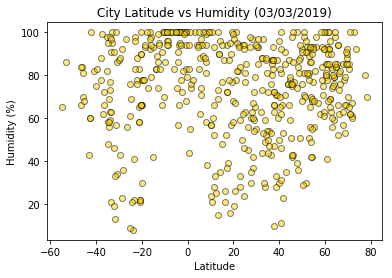

In [31]:
plt.scatter(data_dict[["Lat"]], data_dict[["Humidity"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Humidity (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/Latitude vs Humidity.png",dpi=256,figsize=(18,11))

#### Latitude vs. Cloudiness Plot

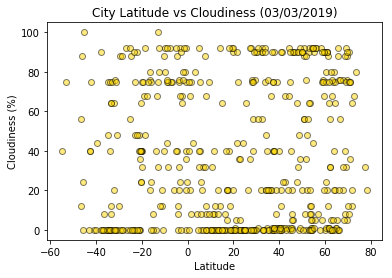

In [32]:
plt.scatter(data_dict[["Lat"]], data_dict[["Cloudiness"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Cloudiness (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./Images/Latitude vs Cloudiness.png",dpi=256,figsize=(18,11))

#### Latitude vs. Wind Speed Plot

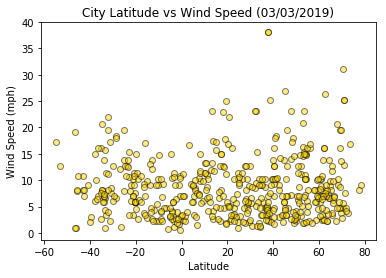

In [33]:
plt.scatter(data_dict[["Lat"]], data_dict[["Wind Speed"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Wind Speed (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./Images/Latitude vs Wind Speed.png",dpi=256,figsize=(18,11))